Made by - <br>Abhilash Chaudhary (M23AID027)<br>

SEM 2 Machine learning Assignment 1 <br>
IIT Jodhpur



**Question 1:**<br>
Implement the k-means and spectral clustering algorithms for clustering the points given in the file:
jain.txt. Plot the obtained results. In order to evaluate the performance of these algorithms, find the
percentage of points for which the estimated cluster label is correct. Report the accuracy of both the
algorithm. The ground truth clustering is given as the third column of the given text file.



**Solution:**<br>
<br>
From the data sheet we can see that there are 2 categories (1 and 2). In the below block we shall be preparing the raw data and plotting the same.<br>

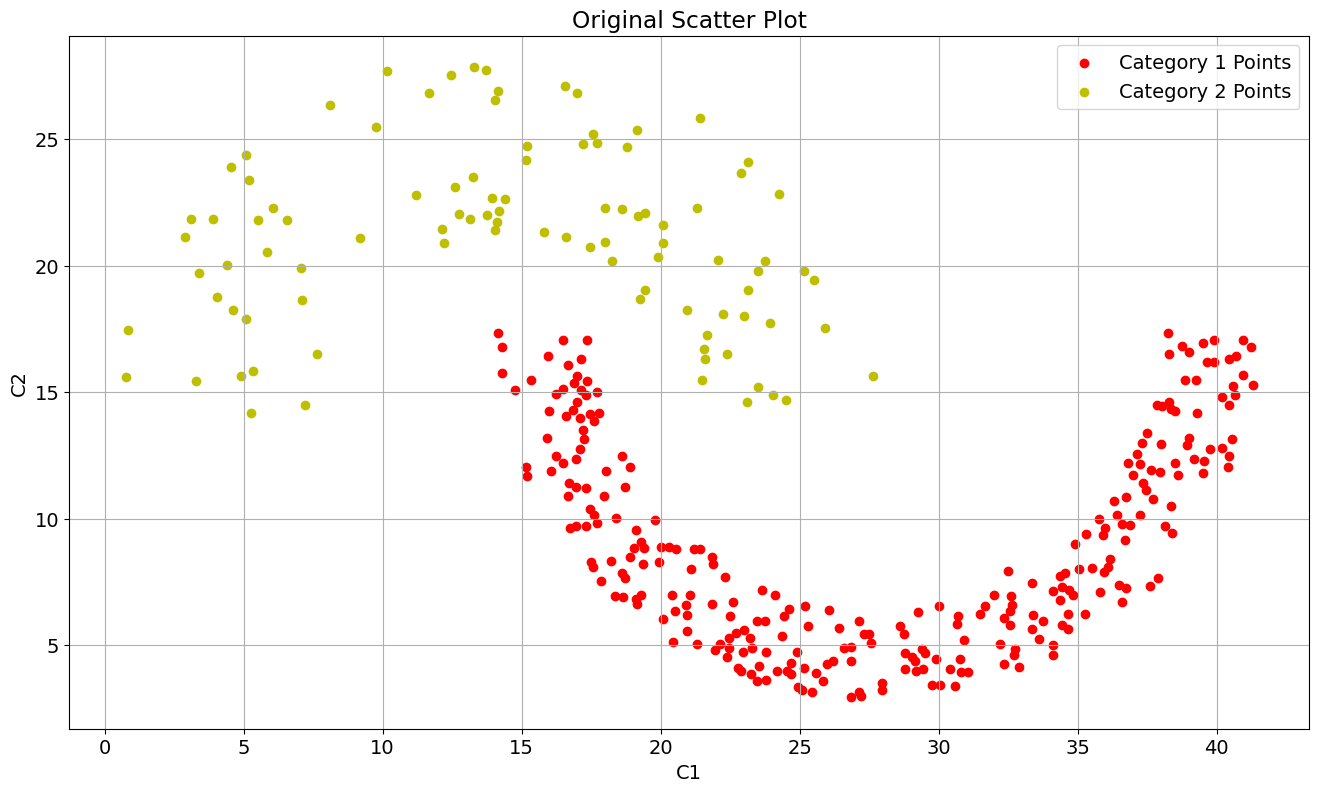

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

random.seed(1)
np.random.seed(1)
plt.figure(figsize = (16, 9))
plt.rcParams.update({'font.size': 14})
cluster_no = 2
allowed_error=0

var_df_file = pd.read_csv('jain.csv', header=None)
var_c_1 = np.array(var_df_file.iloc[:,0])
var_c_2 = np.array(var_df_file.iloc[:,1])
var_category = np.array(var_df_file.iloc[:,2])

#creating data array to check distance from mu1 and mu2
var_df_points = pd.DataFrame(data = [var_c_1,var_c_2], index = [0,1])

#Plotting the existing data
var_cat_1 = pd.DataFrame(index = [0,1])
var_cat_2 = pd.DataFrame(index = [0,1])

for i in range(len(var_category)):
    if var_category[i] == 1:
        var_cat_1 = var_cat_1.append(var_df_points[i],ignore_index=True,sort=False).dropna()
    else:
        var_cat_2 = var_cat_2.append(var_df_points[i],ignore_index=True,sort=False).dropna()

var_cat_1_count=var_cat_1.size/2
var_cat_2_count=var_cat_2.size/2

plt.title('Original Scatter Plot')
plt.scatter(var_cat_1.iloc[:, [0]],var_cat_1.iloc[:, [1]], c='r')
plt.scatter(var_cat_2.iloc[:, [0]],var_cat_2.iloc[:, [1]], c='y')
plt.legend(['Category 1 Points', 'Category 2 Points'])
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()



**K - Means Clustering**

Below we shall be using the K-Means implementation in order to categorize the data into 2 groups. k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.<br>
<br>
The steps involve:<br>
Step 1: Choose the number of clusters k<br>
Step 2: Select k random points from the data as centroids<br>
Step 3: Assign all the points to the closest cluster centroid<br>
Step 5: Repeat steps 3 and 4 until the centroids have stabilized.<br>

Creating functions that will process the KMeans algorithm

In [55]:
def getInitCentroids(var_data_points, cluster_no):
    number_of_samples = var_data_points.shape[0]
    var_rand_mu = random.sample(range(0, number_of_samples), cluster_no)
    var_centroids = [tuple(var_data_points[id]) for id in var_rand_mu]
    var_unique_centroids = list(set(var_centroids))
    var_unique_centroids_count = len(var_unique_centroids)

    while var_unique_centroids_count < cluster_no:
        var_rand_mu_new = random.sample(range(0, number_of_samples), cluster_no - var_unique_centroids_count)
        new_centroids = [tuple(var_data_points[id]) for id in var_rand_mu_new]
        var_unique_centroids = list(set(var_unique_centroids + new_centroids))
        var_unique_centroids_count = len(var_unique_centroids)

    return np.array(var_unique_centroids)

def getDist(var_tmp1, var_tmp2):
    var_tmp1_sq = np.reshape(np.sum(var_tmp1 * var_tmp1, axis=1), (var_tmp1.shape[0], 1))
    var_tmp2_sq = np.reshape(np.sum(var_tmp2 * var_tmp2, axis=1), (1, var_tmp2.shape[0]))
    var_dot=np.dot(var_tmp1,var_tmp2.T)
    var_dist = np.sqrt(-2 * var_dot + var_tmp2_sq + var_tmp1_sq)
    var_dist = np.nan_to_num(var_dist)

    return var_dist

def getClusters(var_data_points, centroids):
    cluster_no = centroids.shape[0]
    clusters = {}
    distance_matrix = getDist(var_data_points, centroids)
    closest_cluster_ids = np.argmin(distance_matrix, axis=1)
    for i in range(cluster_no):
        clusters[i] = []
    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(var_data_points[i])

    return clusters

def checkCentroids(previous_centroids, new_centroids, allowed_error):
    distances_between_old_and_new_centroids = getDist(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= allowed_error
    return centroids_covered

def getKmeans(var_data_points, cluster_no,allowed_error):
    new_centroids = getInitCentroids(var_data_points=var_data_points, cluster_no=cluster_no)

    centroids_covered = False
    while not centroids_covered:
        previous_centroids = new_centroids
        clusters = getClusters(var_data_points, previous_centroids)
        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=var_data_points.dtype) for key in sorted(clusters.keys())])
        centroids_covered = checkCentroids(previous_centroids, new_centroids, allowed_error)

    return new_centroids

Perform K-means clustering

Centroid 1 Point is [15.97542857 16.79457143]
Centroid 2 Point is [31.71540404  8.03737374]
total_accuracy : 81.70289855072464%


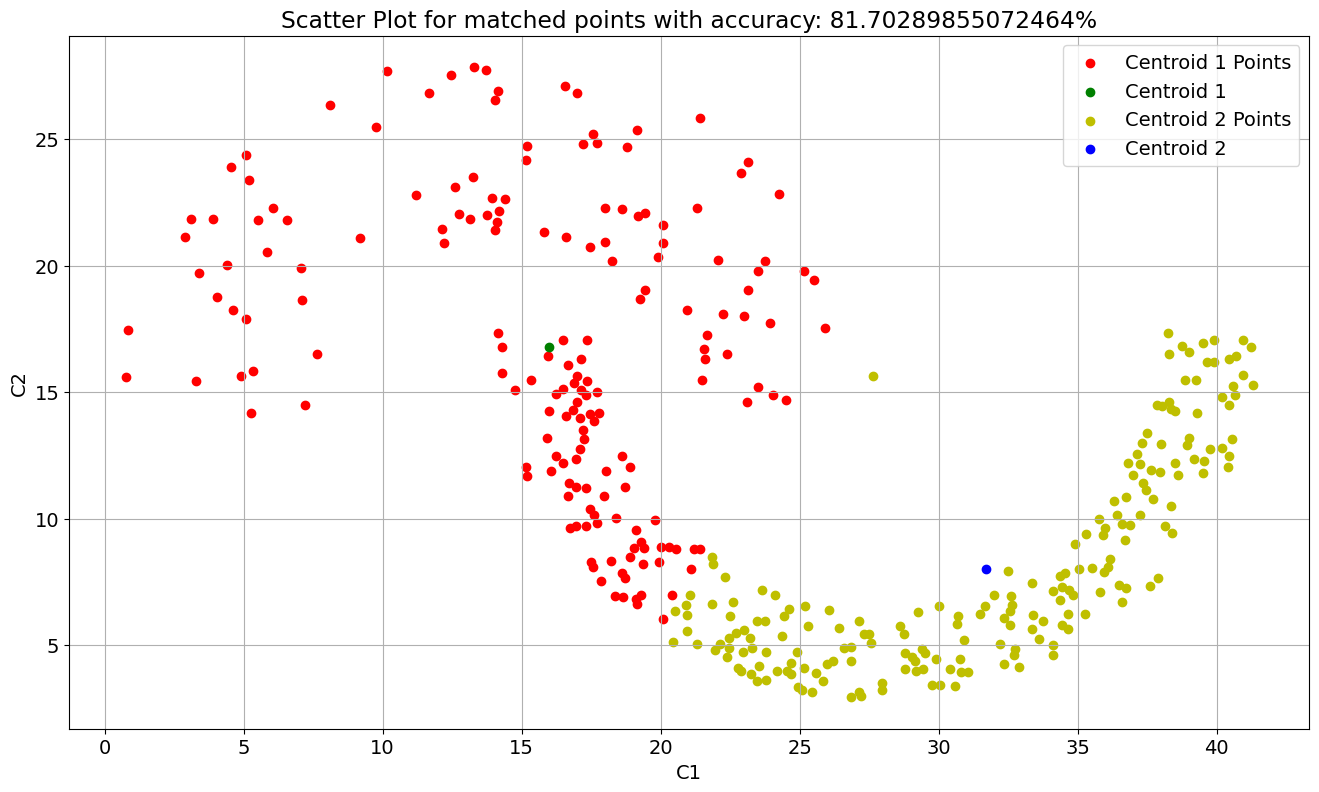

In [56]:
plt.figure(figsize = (16, 9))
plt.rcParams.update({'font.size': 14})

#creating the data points using
var_data_points =np.zeros(2)
for i in range(0, len(var_c_1)):
	var_data_points = np.vstack([var_data_points,np.array([var_c_1[i], var_c_2[i]])])
var_data_points=np.delete(var_data_points, (0), axis=0)


#perform usual K-Means clustering using the data points
var_centroids = getKmeans(var_data_points, cluster_no, allowed_error)
var_clusters = getClusters(var_data_points, var_centroids)

#start plotting

point_colours = ['r', 'y']
centroid_colours = ['g', 'b']

var_centroid_1_cordinate=0
var_centroid_2_cordinate=0
var_centroid_1_accuracy=0
var_centroid_2_accuracy=0

for centroid, points in var_clusters.items():
    i=centroid
    points = np.array(points)
    points_len=len(points)
    centroid = np.mean(points, axis=0)

    if i == 0:
        var_centroid_1_cordinate = centroid
        var_centroid_1_accuracy = points_len/var_cat_1_count*100
        if var_centroid_1_accuracy > 100:
            var_centroid_1_accuracy = 100

    if i == 1:
        var_centroid_2_cordinate = centroid
        var_centroid_2_accuracy = points_len/var_cat_2_count*100
        if var_centroid_2_accuracy > 100:
            var_centroid_2_accuracy = 100

    plt.scatter(points[:, 0], points[:, 1], color=point_colours[i])
    plt.grid()
    plt.scatter(centroid[0], centroid[1], color=centroid_colours[i])

total_accuracy = (var_centroid_1_accuracy+var_centroid_2_accuracy)/2

plt.title('Scatter Plot for matched points with accuracy: '+str(total_accuracy)+'%')
print('Centroid 1 Point is '+str(var_centroid_1_cordinate))
print('Centroid 2 Point is '+str(var_centroid_2_cordinate))
print("total_accuracy : " +str(total_accuracy)+'%')
plt.legend(['Centroid 1 Points','Centroid 1', 'Centroid 2 Points', 'Centroid 2'])
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()


As we can see, the accuracy is approximately 82%.

**Spectral Clustering**

Below we shall be attempting the Spectral Clustering approach for the same dataset to see if we can get a better categorization. Spectral clustering is very simple to implement and can be solved efficiently by standard linear algebra methods. In spectral clustering, the affinity, and not the absolute location (i.e. k-means), determines what points fall under which cluster. The latter is particularly useful in tackling problems where the data forms complicated shapes.<br>
<br>
The steps involve:<br>
Step 1: Choose the number of clusters k<br>
Step 2: Choose the appropriate hyper-parameters lambda and sigma<br>
Step 3: Find the weight matrix of the data<br>
Step 4: Find the diagonal matrix of the data<br>
Step 5: Calculate the Laplacian matrix from the weight and diagonal matrix<br>
Step 6: Calculate the eigen values and vectors from the laplacian matrix<br>
Step 7: Pick the top N eigen values, where N is the number of clusters required<br>
Step 8: Pick the corresponding eigen vectors for the eigen values from step 8. This is the H matrix<br>
Step 9: Run the K-Means algorithm on the H matrix<br>

Perform Spectral Clustering

In [57]:
#hyper parameters
lamda=76
sigmasq=10

#finding the weight matrix
var_weight_matrix = np.exp(-(lamda/sigmasq) * getDist(var_data_points, var_data_points))

#finding diagonal matrix
var_diagonal_matrix = np.diag(var_weight_matrix.sum(axis=1))

#finding laplacian matrix
var_laplacian_matrix =  var_diagonal_matrix - var_weight_matrix

#finding eigen values and vectors
var_eig_values, var_eig_vectors = np.linalg.eig(var_laplacian_matrix)

#picking the top eigen values based on the cluster number
var_eig_values_sorted = np.argsort(var_eig_values)[:cluster_no]

#picking the eigen vectors as per the above eigen values
var_H_matrix=var_eig_vectors[:,var_eig_values_sorted]



Perform K-Means Clustering on the H matrix

Category 2 point count: 97
Category 2 point ground truth: 97.0
Category 1 point count: 276
Category 1 point ground truth: 276.0
Centroid 1 Point is [ 0.05177805 -0.0762088 ]
Centroid 2 Point is [0.05177803 0.02678354]
Total accuracy : 100.0%


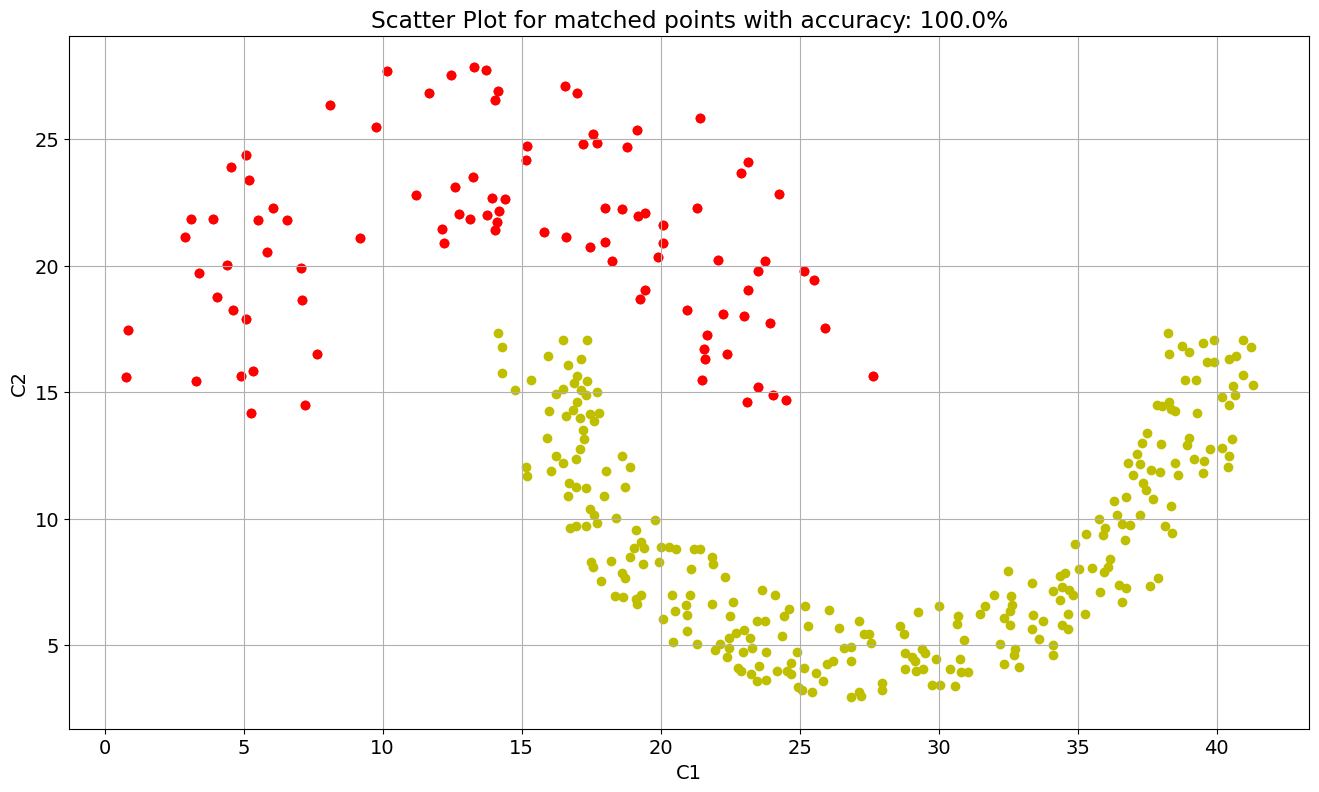

In [59]:
plt.figure(figsize = (16, 9))
plt.rcParams.update({'font.size': 14})

#perform usual K-Means clustering using H matrix
var_centroids = getKmeans(var_H_matrix, cluster_no, allowed_error)
var_clusters = getClusters(var_H_matrix, var_centroids)


#start categorising and plotting
var_centroid_1_cordinate=0
var_centroid_2_cordinate=0
var_centroid_1_accuracy=0
var_centroid_2_accuracy=0
var_centroid_1_len=0
var_centroid_2_len=0

for centroid, points in var_clusters.items():
    i=centroid
    points = np.array(points)
    points_len=len(points)
    centroid = np.mean(points, axis=0)


    if i == 0:
        var_centroid_2_cordinate = centroid
        var_centroid_2_accuracy = points_len/var_cat_2_count*100
        var_centroid_2_len=points_len

        if var_centroid_2_accuracy > 100:
            var_centroid_2_accuracy = 100
        print('Category 2 point count: '+str(points_len))
        print('Category 2 point ground truth: '+str(var_cat_2_count))

    if i == 1:
        var_centroid_1_cordinate = centroid
        var_centroid_1_accuracy = points_len/var_cat_1_count*100
        var_centroid_1_len=points_len

        if var_centroid_1_accuracy > 100:
            var_centroid_1_accuracy = 100
        print('Category 1 point count: '+str(points_len))
        print('Category 1 point ground truth: '+str(var_cat_1_count))

    for j in range(var_centroid_2_len):
        plt.scatter(var_data_points[:, 0][j], var_data_points[:, 1][j], color='r')

    for j in range(var_centroid_1_len):
        plt.scatter(var_data_points[:, 0][var_centroid_2_len+j], var_data_points[:, 1][var_centroid_2_len+j], color='y')
    plt.grid()

total_accuracy = (var_centroid_1_accuracy+var_centroid_2_accuracy)/2
plt.title('Scatter Plot for matched points with accuracy: '+str(total_accuracy)+'%')
print('Centroid 1 Point is '+str(var_centroid_2_cordinate))
print('Centroid 2 Point is '+str(var_centroid_1_cordinate))

print("Total accuracy : " + str(total_accuracy)+'%')

plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()

As we can see, the accuracy is 100%. Hence we can see an increase of an additional 18% on the accuracy by using Spectral Clustering on the dataset.

In [51]:
!jupyter nbconvert --to html A1_Q1.ipynb

[NbConvertApp] Converting notebook A1_Q1.ipynb to html
[NbConvertApp] Writing 880106 bytes to A1_Q1.html
